# Imports

In [159]:
import os
import string
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from number_parser import parse_ordinal

# Study numbers

## Get text numbers data

In [160]:
def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    cleaned_text = text.translate(translator)
    return cleaned_text

def remove_next_line(text):
    return text.replace("\n", " ")

In [161]:
creation_myths_path = "./texts"

# Function to extract numbers from a text
def extract_numbers(text):
    words = text.split()
    numbers = []
    for word in words:
        num = parse_ordinal(word, language="en")
        numbers.append(num) if num else None
    return numbers

In [162]:
# Dictionary to store the counts of each number
number_counts = Counter()

# Loop through each file in the folder
for filename in os.listdir(creation_myths_path):
    if filename.endswith('.txt'):
        with open(os.path.join(creation_myths_path, filename), 'r') as file:
            text = file.read()

            # Remove punctucation
            text = remove_punctuation(text)
            # Remove "\n" used for new lines
            text = remove_next_line(text)

            numbers = extract_numbers(text)
            number_counts.update(numbers)

## Plot text numbers data

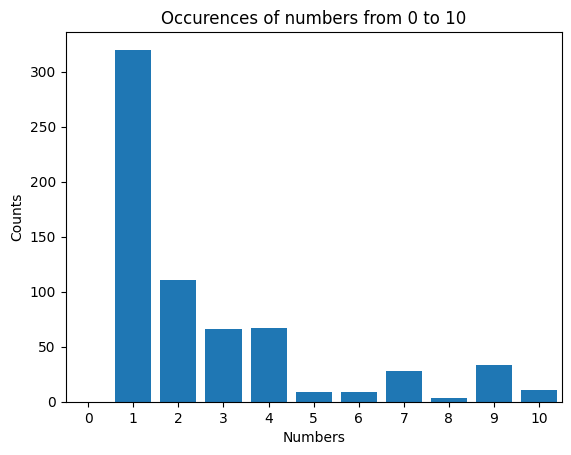

In [166]:
# Occurences of numbers from 0 to 10

plt.bar(number_counts.keys(), number_counts.values())
plt.xticks(range(11))
plt.xlim(-0.5, 10.5)

plt.xlabel('Numbers')
plt.ylabel('Counts')
plt.title('Occurences of numbers from 0 to 10')

plt.show()

In [185]:
# Most common numbers
twenty_most_common_numbers = number_counts.most_common(20)
numbers, _ = zip(*twenty_most_common_numbers)

print(numbers)

(1, 2, 4, 3, 9, 7, 100, 10, 5, 6, 11, 50, 600, 13, 12, 14, 1000, 8, 15, 20)
